##     Products In Rap Lyrics

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import nltk
import re
from nltk.corpus import PlaintextCorpusReader

In [12]:

corpus_root = 'JayZ/'
wordlist = PlaintextCorpusReader(corpus_root, '.*')

In [15]:
def create_corpus(wordlist, some_corpus): 
    
    """
    This function takes in an object of the type PlaintextCorpusReader, and system path.
    It returns an nltk corpus

    It requires the regular expression package re to work
    """
    #process the files so I know what was read in
    
    for fileid in wordlist.fileids():
        raw = wordlist.raw(fileid)
        raw = re.split(r'\W+', raw) ## split the raw text into appropriate words 
        some_corpus.extend(raw)
        print fileid

    return some_corpus

In [16]:
the_corpus = create_corpus(wordlist, []) 

JayZ_American Gangster_American Dreamin.txt
JayZ_American Gangster_American Gangster.txt
JayZ_American Gangster_Blue Magic.txt
JayZ_American Gangster_Fallin.txt
JayZ_American Gangster_Hello Brooklyn 20.txt
JayZ_American Gangster_I Know.txt
JayZ_American Gangster_Ignorant Shit.txt
JayZ_American Gangster_Intro.txt
JayZ_American Gangster_No Hook.txt
JayZ_American Gangster_Party Life.txt
JayZ_American Gangster_Pray.txt
JayZ_American Gangster_Say Hello.txt
JayZ_American Gangster_Success.txt
JayZ_American Gangster_Sweet.txt
JayZ_Collision Course_Big Pimpin  Papercut.txt
JayZ_Collision Course_Dirt Off Your Shoulder  Lying From You.txt
JayZ_Collision Course_Izzo  In The End.txt
JayZ_Collision Course_Jigga What  Faint.txt
JayZ_Collision Course_Numb  Encore.txt
JayZ_Collision Course_Points Of Authority  99 Problems  One Step Closer.txt
JayZ_In My Lifetime Vol. 1_Face Off.txt
JayZ_In My Lifetime Vol. 1_Friend Or Foe '98.txt
JayZ_In My Lifetime Vol. 1_I Know What Girls Like.txt
JayZ_In My Lifetime

In [17]:
len(the_corpus)

119302

In [18]:
the_corpus[:10]

[u'Dreamed',
 u'of',
 u'you',
 u'this',
 u'morning',
 u'Then',
 u'came',
 u'the',
 u'dawn',
 u'and']

In [19]:
Albums = wordlist.fileids()
Albums[:14]
[fileid for fileid in Albums[:14]]

['JayZ_American Gangster_American Dreamin.txt',
 'JayZ_American Gangster_American Gangster.txt',
 'JayZ_American Gangster_Blue Magic.txt',
 'JayZ_American Gangster_Fallin.txt',
 'JayZ_American Gangster_Hello Brooklyn 20.txt',
 'JayZ_American Gangster_I Know.txt',
 'JayZ_American Gangster_Ignorant Shit.txt',
 'JayZ_American Gangster_Intro.txt',
 'JayZ_American Gangster_No Hook.txt',
 'JayZ_American Gangster_Party Life.txt',
 'JayZ_American Gangster_Pray.txt',
 'JayZ_American Gangster_Say Hello.txt',
 'JayZ_American Gangster_Success.txt',
 'JayZ_American Gangster_Sweet.txt']

In [20]:
the_corpus[34990:35000]

[u'die',
 u'And',
 u'even',
 u'if',
 u'Jehovah',
 u'witness',
 u'bet',
 u'he',
 u'll',
 u'never']

We can now go ahead and figure out the number of unique words used in Jay Z's first 35,000 lyrics. An astute observer will notice that we have not done any data cleaning. For example, take a look inside a slice of the corpus, the last 10 words `the_corpus[34990:35000]`, `['die', 'And', 'even', 'if', 'Jehovah', 'witness', 'bet', 'he', 'll', 'never']`, you will see it has treated the contraction "I'm" as two separate words. The `create_corpus` function that we used, works by separating each contiguous chunk of alphabets separated by punctuations or space as a word. As a result contractions like "I'm" gets treated as two words. We can use the function `lexical_diversity` to determine the number of unique words in our Jay Z corpus.

In [21]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = word_count / vocab_size
    return diversity_score

If we call our function on the Jay Z sliced corpus, it should give us a score.

In [25]:
lexical_diversity(the_corpus[:35000])



6

In [26]:
[fileid[5:] for fileid in Albums[:14]]

['American Gangster_American Dreamin.txt',
 'American Gangster_American Gangster.txt',
 'American Gangster_Blue Magic.txt',
 'American Gangster_Fallin.txt',
 'American Gangster_Hello Brooklyn 20.txt',
 'American Gangster_I Know.txt',
 'American Gangster_Ignorant Shit.txt',
 'American Gangster_Intro.txt',
 'American Gangster_No Hook.txt',
 'American Gangster_Party Life.txt',
 'American Gangster_Pray.txt',
 'American Gangster_Say Hello.txt',
 'American Gangster_Success.txt',
 'American Gangster_Sweet.txt']

In [27]:
basketball_bag_of_words = ['bounce','crossover','technical',
 'shooting','double','jump','goal','backdoor','chest','ball',
 'team','block','throw','offensive','point','airball','pick',
 'assist','shot','layup','break','dribble','roll','cut','forward',
 'move','zone','three-pointer','free','post','fast','blocking','backcourt',
 'violation','foul','field','pass','turnover','alley-oop','guard']

In [28]:
cfd = nltk.ConditionalFreqDist(
          (target, fileid[5:])
           for fileid in Albums[:14]
           for w in wordlist.words(fileid)
           for target in basketball_bag_of_words
           if w.lower().startswith(target))

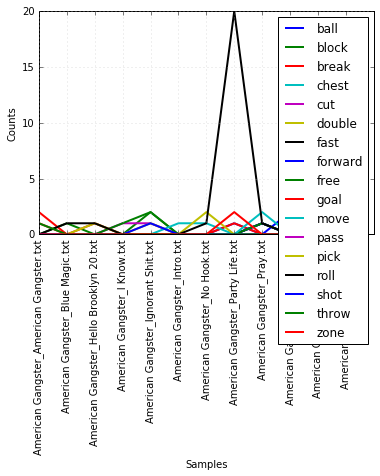

In [30]:
cfd.plot()

From the plot we see that the basketball term "roll" seems to be used extensively in the song *Party Life*. Let's take a closer look at this phenomenon, and determine if "roll" was used in the "basketball" sense of the term. To do this, we need to see the context in which it was used. What we really need is a concordance. Let's build one.

The first thing I want to do is to create a corpus that only contain words from the American Gangster album.

Building a concordance, gets us to the area of elementary information retrieval (IR)<a href="#fn1" id="ref1">1</a>, think, <i> basic search engine</i>. So why do we even need to “normalize” terms? We want to match <b>U.S.A.</b> and <b>USA</b>. Also when we enter <b>roll</b>, we would like to match <b>Roll</b>, and <b>rolling</b>. One way to do this is to stem the word. That is, reduce it down to its base/stem/root form. As such <b>automate(s)</b>, <b>automatic</b>, <b>automation</b> all reduced to <b>automat</b>. Most stemmers are pretty basic and just chop off standard affixes indicating things like tense (e.g., "-ed") and possessive forms (e.g., "-'s"). Here, we'll use the most popular english language stemmer, the Potter stemmer, which comes with NLTK. 

Once our tokens are stemmed, we can rest easy knowing that roll, Rolling, Rolls will all stem to roll.

<sup id="fn1">1. Some of this content has been adapted from Dan Jurafsky's <a href="https://web.stanford.edu/class/cs124/">Stanford CS124 class</a><a href="#ref1" title="Jump back to footnote 1 in the text."></a></sup>

    
Now we can go ahead and create a concordance to test if "roll" is used in the basketball (pick and roll) sense or not.

In [41]:
class IndexedText(object):                                          
    # object oriented programming techniques that are outside the scope of this book

    def __init__(self, stemmer, text, on_the_fly=False):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)              
        # pre-computes index for EVERY WORD. wouldn't it be better to do this on the fly? 
        # especially since this class is used INTERACTIVELY??
        for (i, word) in enumerate(text))  # enumerate() from 4.2 (ahhhh)
        self.__on_the_fly = on_the_fly
    
    def __make_index(self, word):
        if self.__on_the_fly:
            _index = { self._stem(word): [i for (i, w) in enumerate(self._text) if w == word] }  
        else:
            pass

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = width/4                # words of context
        self.__make_index(word)
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '%*s'  % (width, lcontext[-width:])          
            # string formatting from 3.9
            rdisplay = '%-*s' % (width, rcontext[:width])           
            # recall that the "*" allows width to be specified at runtime
            print ldisplay, rdisplay

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [45]:

J_lyrics = IndexedText(porter, the_corpus)
J_lyrics.concordance('nike')

Y know powder blue Roc a Wear suit white Nike her Add mami to the cypher R O C   
     we Y all don t rock your Roc A Wear Nike checks like we Y all coach class y 
la back CHORUS All I need Rocawear check Nike Airs check Mean bucket uh huh Armad
n t strapped that means I took em off my Nike Airs Get off mine y all talk shit l
t every rhyme be in check like a pair of Nikes Amil Beanie Siegal Would ya love m


Based on the context, you can decide if the word "roll" is used in a basketball sense. This is really where the "art" of the word "Arts and Sciences" comes to play in Data Science and NLP.